In [3]:
# Network Intrusion Detection using Machine Learning Approach

#Author - Ramkuamr 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler , Normalizer
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV

from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor
import xgboost as xgb

from sklearn import metrics
from mlxtend import evaluate
from mlxtend import plotting

# Importing the Dataset 


## The UNSW-NB15 data set description: 

The raw network packets of the UNSW-NB 15 data set is created by the IXIA PerfectStorm tool in the Cyber Range Lab of the Australian Centre for Cyber Security (ACCS) for generating a hybrid of real modern normal activities and synthetic contemporary attack behaviours. 

 Tcpdump tool is utilised to capture 100 GB of the raw traffic (e.g., Pcap files). 
 
### This data set has nine families of attacks, namely, 

1. Fuzzers
2. Analysis
3. Backdoors
4. DoS
5. Exploits
6. Generic
7. Reconnaissance
8. Shellcode
9. Worms

In [11]:
#provide the path to the train and test dataset

train_df = pd.read_csv(r"D:\Network_ML\ML_data\data\a part of training and testing set\dataset.csv")
test_df = pd.read_csv(r"D:\Network_ML\ML_data\data\a part of training and testing set\UNSW_NB15_testing-set.csv")

In [12]:
train_df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


# Data Cleaning and Pre-Processing

## Checking the Missing values and Perform Imputation

In [13]:
train_df.isna().sum()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

In [14]:
#Data does not have any missing values 

### There is no missing values in the dataset

In [5]:
train_df.columns

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

In [6]:
len(train_df.columns)

45

In [15]:
# Checking the dataset dtypes 
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
id                   82332 non-null int64
dur                  82332 non-null float64
proto                82332 non-null object
service              82332 non-null object
state                82332 non-null object
spkts                82332 non-null int64
dpkts                82332 non-null int64
sbytes               82332 non-null int64
dbytes               82332 non-null int64
rate                 82332 non-null float64
sttl                 82332 non-null int64
dttl                 82332 non-null int64
sload                82332 non-null float64
dload                82332 non-null float64
sloss                82332 non-null int64
dloss                82332 non-null int64
sinpkt               82332 non-null float64
dinpkt               82332 non-null float64
sjit                 82332 non-null float64
djit                 82332 non-null float64
swin                 82332 non-n

In [23]:
# Checking the unique attack types
train_df.attack_cat.unique()

array(['Normal', 'Reconnaissance', 'Backdoor', 'DoS', 'Exploits',
       'Analysis', 'Fuzzers', 'Worms', 'Shellcode', 'Generic'],
      dtype=object)

## Dataset Features and Range

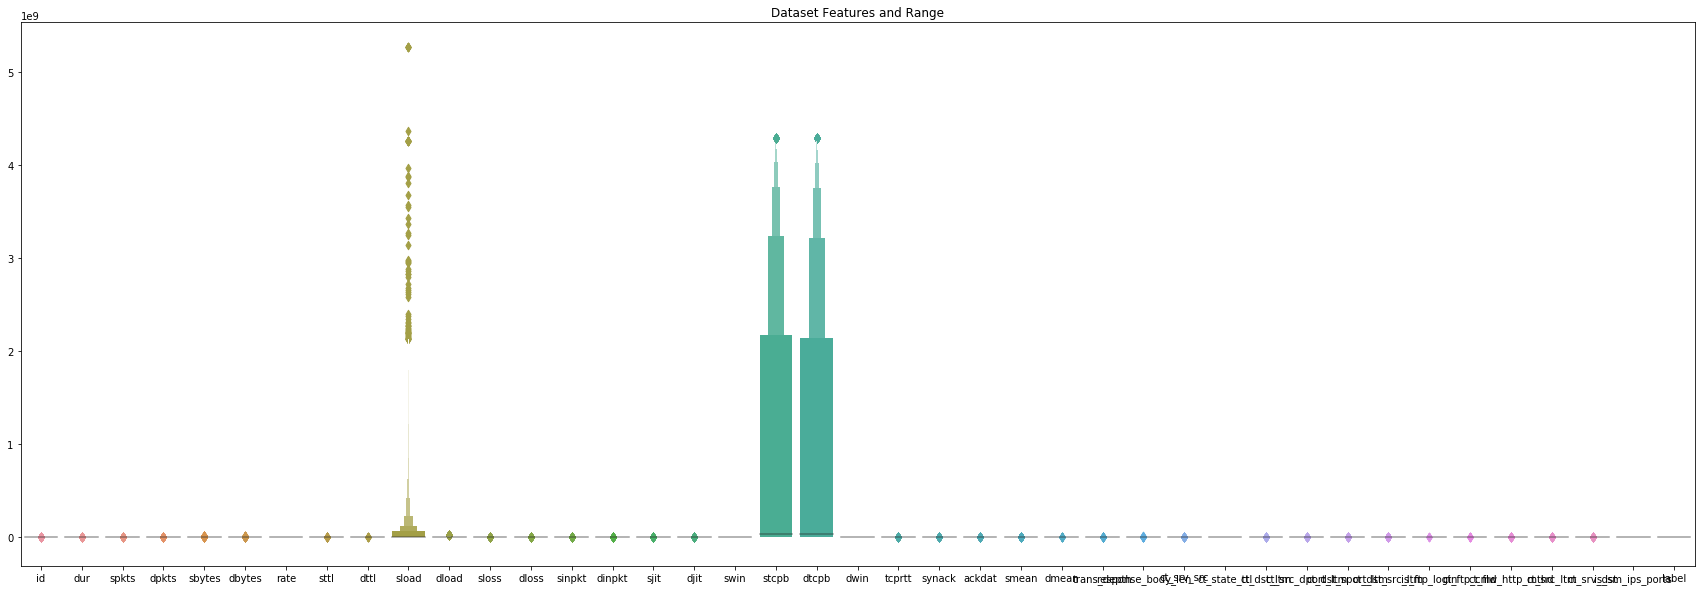

In [24]:
plt.figure(figsize= (30 , 10))
plt.title("Dataset Features and Range")
sns.boxenplot(data= train_df)
plt.show()

In [25]:
# presence of outliers in three of the features

In [26]:
train_df[train_df.columns[train_df.dtypes== object]].head()

,proto,service,state,attack_cat
0,udp,-,INT,Normal
1,udp,-,INT,Normal
2,udp,-,INT,Normal
3,udp,-,INT,Normal
4,udp,-,INT,Normal


In [27]:
train_df.columns

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

In [28]:
train_df[train_df.columns[train_df.dtypes!= object]].head()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,1,0.000011,2,0,496,0,90909.0902,254,0,180363632.0,...,1,1,2,0,0,0,1,2,0,0
1,2,0.000008,2,0,1762,0,125000.0003,254,0,881000000.0,...,1,1,2,0,0,0,1,2,0,0
2,3,0.000005,2,0,1068,0,200000.0051,254,0,854400000.0,...,1,1,3,0,0,0,1,3,0,0
3,4,0.000006,2,0,900,0,166666.6608,254,0,600000000.0,...,2,1,3,0,0,0,2,3,0,0
4,5,0.000010,2,0,2126,0,100000.0025,254,0,850400000.0,...,2,1,3,0,0,0,2,3,0,0


## Checking the target values

In [29]:
train_df.label.value_counts()

1    45332
0    37000
Name: label, dtype: int64

In [30]:
### There is no major Class imbalances in the target values ###

In [31]:
len(train_df)

82332

1 - Intrusion Attack Transaction

2 - Normal Transaction

### removing the attack_cat column to prevent data leak in the model prediction

In [33]:
train_df = train_df.drop(['attack_cat'] , axis=1)

## Data Preprocessing Steps

### Reusable Codes - Creating a class with methods for performing Preprocessing steps which can be resused based on the requriements

In [77]:
# Class with methods for Data preprocessing 

class preprocessing:
    
    
    "Class with instance methods to perform pre-processing steps such as Encoding, Data Scaling. \
     Methods Returns the convertes values"
    
    
    def __init__ (self , data):
        
        self.data = data
        
    def encoding_steps(self , feature , type_enc = 'label'):
        
        "Method to convert categorical values to numerical using Encoding algorithms. \
        Parameters : Feature of Dataset and Encoding type "

        
        if type_enc == 'label':
            
            encoder = LabelEncoder()
        
            return encoder.fit_transform(self.data[feature])
        
        if type_enc == 'one_hot':
            
            encoder = OneHotEncoder()
            
            return encoder.fit_transform(self.data[feature])
        
    
    def data_scaling(self , type_scale = 'minmax'):
        
        "Method to scale the data. Parameters : Scaling type"
        
        if type_scale == 'minmax':
            
            scaler = MinMaxScaler()
            
            return scaler.fit_transform(self.data)
            
        if type_scale == 'normal':
                
            scaler = Normalizer()
                
            return scalar.fit_transform(self.data)
    

### Checking the Categorical Variables in the dataset

In [40]:
train_df[train_df.columns[train_df.dtypes== object]].head()

,proto,service,state
0,udp,-,INT
1,udp,-,INT
2,udp,-,INT
3,udp,-,INT
4,udp,-,INT


In [41]:
len(train_df.proto.unique())

131

In [42]:
train_df.service.value_counts()

-           47153
dns         21367
http         8287
smtp         1851
ftp          1552
ftp-data     1396
pop3          423
ssh           204
ssl            30
snmp           29
dhcp           26
radius          9
irc             5
Name: service, dtype: int64

In [43]:
train_df.proto.unique()

array(['udp', 'arp', 'tcp', 'igmp', 'ospf', 'sctp', 'gre', 'ggp', 'ip',
       'ipnip', 'st2', 'argus', 'chaos', 'egp', 'emcon', 'nvp', 'pup',
       'xnet', 'mux', 'dcn', 'hmp', 'prm', 'trunk-1', 'trunk-2',
       'xns-idp', 'leaf-1', 'leaf-2', 'irtp', 'rdp', 'netblt', 'mfe-nsp',
       'merit-inp', '3pc', 'idpr', 'ddp', 'idpr-cmtp', 'tp++', 'ipv6',
       'sdrp', 'ipv6-frag', 'ipv6-route', 'idrp', 'mhrp', 'i-nlsp', 'rvd',
       'mobile', 'narp', 'skip', 'tlsp', 'ipv6-no', 'any', 'ipv6-opts',
       'cftp', 'sat-expak', 'ippc', 'kryptolan', 'sat-mon', 'cpnx', 'wsn',
       'pvp', 'br-sat-mon', 'sun-nd', 'wb-mon', 'vmtp', 'ttp', 'vines',
       'nsfnet-igp', 'dgp', 'eigrp', 'tcf', 'sprite-rpc', 'larp', 'mtp',
       'ax.25', 'ipip', 'aes-sp3-d', 'micp', 'encap', 'pri-enc', 'gmtp',
       'ifmp', 'pnni', 'qnx', 'scps', 'cbt', 'bbn-rcc', 'igp', 'bna',
       'swipe', 'visa', 'ipcv', 'cphb', 'iso-tp4', 'wb-expak', 'sep',
       'secure-vmtp', 'xtp', 'il', 'rsvp', 'unas', 'fc', 'iso-ip',


In [44]:
train_df.state.unique()

array(['INT', 'FIN', 'REQ', 'ACC', 'CON', 'RST', 'CLO'], dtype=object)

Since there are many categorical values in these features. label Encoding is used for "service" and "state" . Frequency encoding is used for "proto"

### Label Encoding  for "Service" Feature

In [79]:
# Defining object for the class
pre_obj = preprocessing(data= train_df)

In [56]:
#Doc String of the class
pre_obj.__doc__

'Class with instance methods to perform pre-processing steps such as Encoding, Data Scaling.      Methods Returns the convertes values'

In [57]:
# Intializing the Dataset to the class

pre_obj.data = train_df

#### Applying Label Ecoding to the "service" feature in the dataset

Since the feature "Service" in the dataset has many categories , encoding this feature with one-hot encoding will lead to overfitting. Therefore Label encoding it used 

In [59]:
train_df.service = pre_obj.encoding_steps(feature= 'service' , type_enc= 'label')

In [60]:
train_df.service.value_counts()

0     47153
2     21367
5      8287
9      1851
3      1552
4      1396
7       423
11      204
12       30
10       29
1        26
8         9
6         5
Name: service, dtype: int64

#### Applying Label Ecoding to the "state" feature in the dataset

Since the feature "state" in the dataset has many categories , encoding this feature with one-hot encoding will lead to overfitting. Therefore Label encoding it used

In [64]:
train_df.state.value_counts()

3    39339
4    34163
2     6982
5     1842
0        4
6        1
1        1
Name: state, dtype: int64

In [65]:
train_df.state = pre_obj.encoding_steps(feature= 'state' , type_enc= 'label')

In [66]:
train_df.state.value_counts()

3    39339
4    34163
2     6982
5     1842
0        4
6        1
1        1
Name: state, dtype: int64

#### Applying Frequency encoding fo "proto" feature , since there is a large occurance of categorical values

In [67]:
train_df[train_df.columns[train_df.dtypes== object]].head()

,proto
0,udp
1,udp
2,udp
3,udp
4,udp


In [68]:
train_df.proto.value_counts()

tcp     43095
udp     29418
unas     3515
arp       987
ospf      676
        ...  
il         32
skip       32
crtp       32
ib         31
igmp       30
Name: proto, Length: 131, dtype: int64

In [69]:
train_df.proto = train_df.proto.replace(train_df.proto.value_counts())

In [70]:
train_df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,1,0.000011,29418,0,4,2,0,496,0,90909.0902,...,1,1,2,0,0,0,1,2,0,0
1,2,0.000008,29418,0,4,2,0,1762,0,125000.0003,...,1,1,2,0,0,0,1,2,0,0
2,3,0.000005,29418,0,4,2,0,1068,0,200000.0051,...,1,1,3,0,0,0,1,3,0,0
3,4,0.000006,29418,0,4,2,0,900,0,166666.6608,...,2,1,3,0,0,0,2,3,0,0
4,5,0.000010,29418,0,4,2,0,2126,0,100000.0025,...,2,1,3,0,0,0,2,3,0,0


## Seperating Features and Target

In [71]:
features = train_df.drop(['label'] , axis=1)

In [72]:
target = train_df.label

# Feature Scaling

In [80]:
# Realigning the dataset
pre_obj.data = features

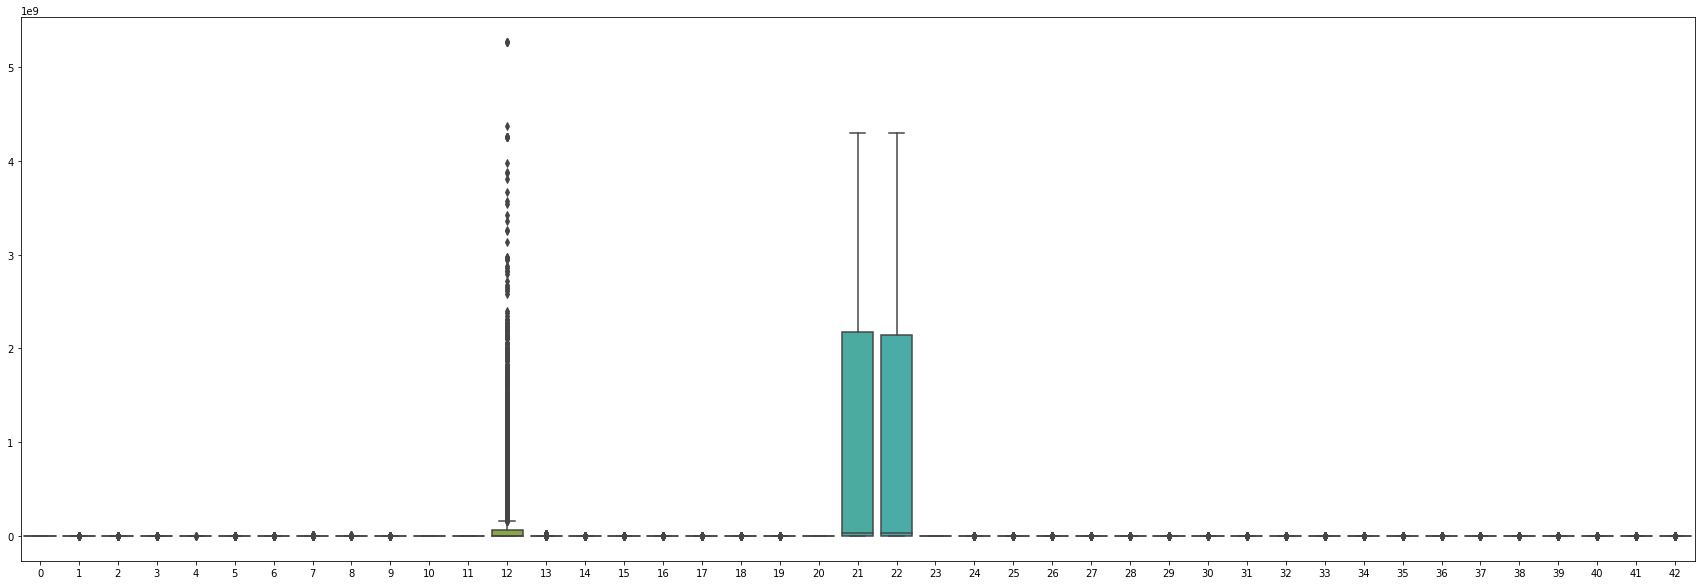

In [74]:
plt.figure(figsize= (30 , 10))
sns.boxplot(data= np.array(features))

In [82]:
features_scaled = pre_obj.data_scaling(type_scale='minmax')

In [83]:
features_scaled_df = pd.DataFrame(features_scaled, columns= train_df.drop(['label'] , axis=1).columns)

In [84]:
features_scaled_df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
0,0.000000,1.833334e-07,0.68241,0.0,0.666667,0.000094,0.0,0.000033,0.0,0.090909,...,0.000000,0.000000,0.0,0.016129,0.0,0.0,0.0,0.000000,0.016393,0.0
1,0.000012,1.333334e-07,0.68241,0.0,0.666667,0.000094,0.0,0.000121,0.0,0.125000,...,0.000000,0.000000,0.0,0.016129,0.0,0.0,0.0,0.000000,0.016393,0.0
2,0.000024,8.333335e-08,0.68241,0.0,0.666667,0.000094,0.0,0.000073,0.0,0.200000,...,0.000000,0.000000,0.0,0.032258,0.0,0.0,0.0,0.000000,0.032787,0.0
3,0.000036,1.000000e-07,0.68241,0.0,0.666667,0.000094,0.0,0.000061,0.0,0.166667,...,0.017241,0.017241,0.0,0.032258,0.0,0.0,0.0,0.016949,0.032787,0.0
4,0.000049,1.666667e-07,0.68241,0.0,0.666667,0.000094,0.0,0.000146,0.0,0.100000,...,0.017241,0.017241,0.0,0.032258,0.0,0.0,0.0,0.016949,0.032787,0.0


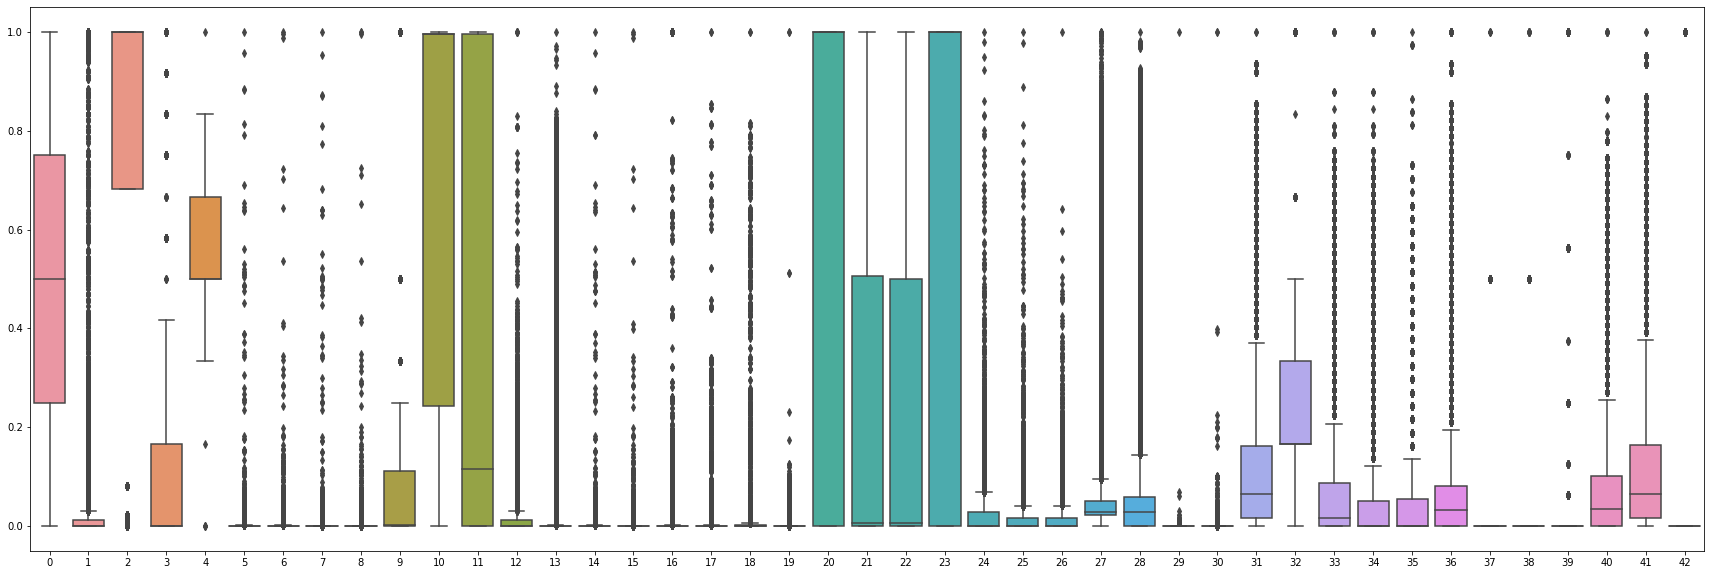

In [85]:
plt.figure(figsize= (30 , 10))
sns.boxplot(data= features_scaled)

All Features are scaled to avoid impact on outliers on the Model Prediction and bring all features into a range

# Feature Selection /Elimination

In [86]:
# setting up a base model for the RFE

In [87]:
features_scaled_df = features_scaled_df.drop(['id'] , axis=1)

In [88]:
rf_base_model = RandomForestClassifier()

In [89]:
len(features_scaled)

82332

In [90]:
rf_base_model.fit(features_scaled_df , target)

C:\Users\ramda\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [91]:
rfe = RFE(rf_base_model, 15)             # running RFE
rfe = rfe.fit(features_scaled_df, target)

In [92]:
rfe.ranking_

array([ 5,  1, 10, 25, 14, 17,  1,  1,  1,  1, 19,  1,  1,  9, 11,  2,  3,
        8,  6, 22, 12, 20, 28,  1,  1, 15,  1,  4, 23, 18,  1,  1,  7, 13,
        1,  1, 26, 27, 21, 16,  1, 24])

In [93]:
rfe.support_

array([False,  True, False, False, False, False,  True,  True,  True,
        True, False,  True,  True, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False,  True,
       False, False, False,  True,  True, False, False,  True,  True,
       False, False, False, False,  True, False])

In [94]:
list(zip(features_scaled_df.columns,rfe.support_,rfe.ranking_))

[('dur', False, 5),
 ('proto', True, 1),
 ('service', False, 10),
 ('state', False, 25),
 ('spkts', False, 14),
 ('dpkts', False, 17),
 ('sbytes', True, 1),
 ('dbytes', True, 1),
 ('rate', True, 1),
 ('sttl', True, 1),
 ('dttl', False, 19),
 ('sload', True, 1),
 ('dload', True, 1),
 ('sloss', False, 9),
 ('dloss', False, 11),
 ('sinpkt', False, 2),
 ('dinpkt', False, 3),
 ('sjit', False, 8),
 ('djit', False, 6),
 ('swin', False, 22),
 ('stcpb', False, 12),
 ('dtcpb', False, 20),
 ('dwin', False, 28),
 ('tcprtt', True, 1),
 ('synack', True, 1),
 ('ackdat', False, 15),
 ('smean', True, 1),
 ('dmean', False, 4),
 ('trans_depth', False, 23),
 ('response_body_len', False, 18),
 ('ct_srv_src', True, 1),
 ('ct_state_ttl', True, 1),
 ('ct_dst_ltm', False, 7),
 ('ct_src_dport_ltm', False, 13),
 ('ct_dst_sport_ltm', True, 1),
 ('ct_dst_src_ltm', True, 1),
 ('is_ftp_login', False, 26),
 ('ct_ftp_cmd', False, 27),
 ('ct_flw_http_mthd', False, 21),
 ('ct_src_ltm', False, 16),
 ('ct_srv_dst', True, 

## Important Features from RFE

In [95]:
col = features_scaled_df.columns[rfe.support_]
col

Index(['proto', 'sbytes', 'dbytes', 'rate', 'sttl', 'sload', 'dload', 'tcprtt',
       'synack', 'smean', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'ct_srv_dst'],
      dtype='object')

In [96]:
features_scaled_rfe = features_scaled_df[col]

In [97]:
len(features_scaled_rfe)

82332

In [98]:
len(features_scaled_df)

82332

In [99]:
features_scaled_rfe.head()

,proto,sbytes,dbytes,rate,sttl,sload,dload,tcprtt,synack,smean,ct_srv_src,ct_state_ttl,ct_dst_sport_ltm,ct_dst_src_ltm,ct_srv_dst
0,0.68241,0.000033,0.0,0.090909,0.996078,0.034238,0.0,0.0,0.0,0.151351,0.016129,0.333333,0.0,0.016129,0.016393
1,0.68241,0.000121,0.0,0.125000,0.996078,0.167236,0.0,0.0,0.0,0.579054,0.016129,0.333333,0.0,0.016129,0.016393
2,0.68241,0.000073,0.0,0.200000,0.996078,0.162187,0.0,0.0,0.0,0.344595,0.032258,0.333333,0.0,0.032258,0.032787
3,0.68241,0.000061,0.0,0.166667,0.996078,0.113895,0.0,0.0,0.0,0.287838,0.032258,0.333333,0.0,0.032258,0.032787
4,0.68241,0.000146,0.0,0.100000,0.996078,0.161427,0.0,0.0,0.0,0.702027,0.032258,0.333333,0.0,0.032258,0.032787


# Feature Correlation / VIF

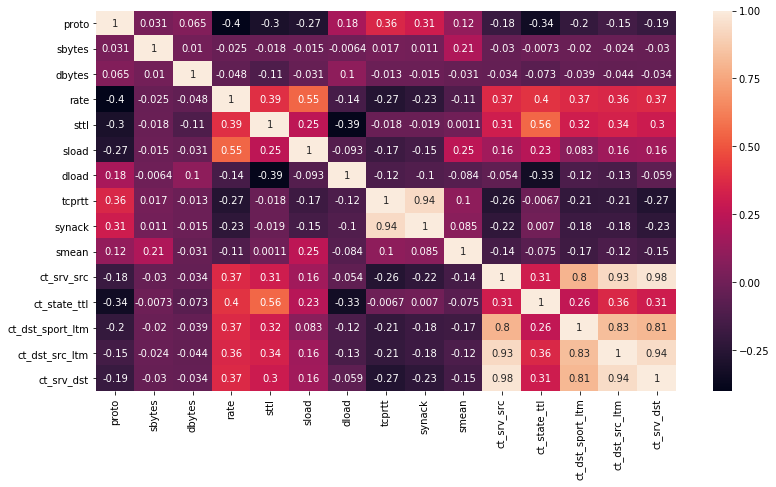

In [100]:
plt.figure(figsize= (13 , 7))
sns.heatmap(features_scaled_rfe.corr() , annot= True)

In [101]:
# it appers that some of the features are highly correlated

## Applying VIF to check Multi Collinearity in the Dataset

In [103]:
vif = pd.DataFrame()
X = features_scaled_rfe
vif['Features'] = features_scaled_rfe.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,ct_srv_dst,41.71
10,ct_srv_src,38.10
13,ct_dst_src_ltm,14.30
7,tcprtt,11.58
8,synack,10.18
4,sttl,6.05
12,ct_dst_sport_ltm,4.32
11,ct_state_ttl,4.27
0,proto,4.16
3,rate,2.64


In [104]:
# Let us drop 'ct_srv_src' column due to high VIF and high correlation from other features

In [105]:
features_scaled_rfe = features_scaled_rfe.drop(['ct_srv_src'] , axis=1)

In [106]:
vif = pd.DataFrame()
X = features_scaled_rfe
vif['Features'] = features_scaled_rfe.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,ct_srv_dst,14.43
12,ct_dst_src_ltm,13.87
7,tcprtt,11.58
8,synack,10.18
4,sttl,6.02
11,ct_dst_sport_ltm,4.32
10,ct_state_ttl,4.27
0,proto,4.14
3,rate,2.64
5,sload,1.99


In [107]:
# Let us use these features for Model building

# Train Test Split

In [108]:
X_train , X_test , Y_train , Y_test = train_test_split(features_scaled_rfe , target)

# Base Model to check initial Accuracy

In [109]:
rf_base_model = RandomForestClassifier()

In [110]:
rf_base_model.fit(X_train , Y_train)

C:\Users\ramda\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [111]:
predictions = rf_base_model.predict(X_test)

In [112]:
metrics.accuracy_score(Y_test , predictions)

0.9694893844434728

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2628632bd48>)

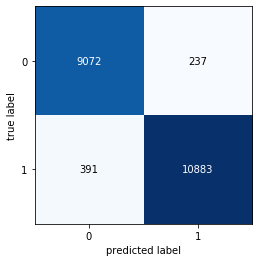

In [113]:
plotting.plot_confusion_matrix(evaluate.confusion_matrix(Y_test , predictions))

In [114]:
print(metrics.classification_report(Y_test , predictions))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      9309
           1       0.98      0.97      0.97     11274

    accuracy                           0.97     20583
   macro avg       0.97      0.97      0.97     20583
weighted avg       0.97      0.97      0.97     20583



Base Model Achieve 96.8% Accuracy Score with good Precisiona and Recall for both the Classes - Normal and Fradualent Transactions

Text(0.5, 0, 'False Positive Rate')

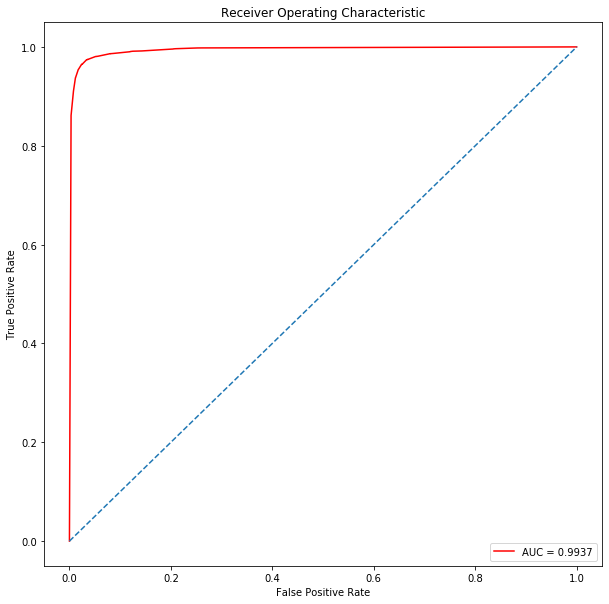

In [115]:
result_proba_rf = rf_base_model.predict_proba(X_test)[:,1] 

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, result_proba_rf)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

## Model on Real test Data - Preprocessing the test data

###  Applying Same Preprocessing steps to the test data

In [116]:
test_df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [120]:
pre_obj.data = test_df

In [122]:
test_df.service = pre_obj.encoding_steps(feature= 'service' , type_enc= 'label')

test_df.state = pre_obj.encoding_steps(feature= 'state' , type_enc= 'label')

test_df.proto = test_df.proto.replace(test_df.proto.value_counts())


## Seperating Features and Target

features_test = test_df.drop(['label'] , axis=1)

In [123]:
len(features_test)

175341

In [124]:
len(test_df)

175341

In [125]:
target_test = test_df.label

In [136]:
pre_obj.data = features_test

In [137]:
#features_test = features_test.drop(['attack_cat'], axis=1)

In [139]:
features_test_scaled = pre_obj.data_scaling(type_scale='minmax')

features_test_scaled_df = pd.DataFrame(features_test_scaled, columns= test_df.drop(['label' , 'attack_cat'] , axis=1).columns)

In [140]:
len(features_test_scaled_df)

175341

In [141]:
features_test_scaled_df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
0,0.000000,0.002025,1.0,0.00,0.25,0.000520,0.000364,0.000018,0.000012,0.000074,...,0.00,0.00,0.0,0.000000,0.00,0.00,0.0,0.000000,0.000000,0.0
1,0.000006,0.010832,1.0,0.00,0.25,0.001352,0.003463,0.000054,0.002867,0.000078,...,0.00,0.00,0.0,0.015625,0.00,0.00,0.0,0.000000,0.081967,0.0
2,0.000011,0.027052,1.0,0.00,0.25,0.000728,0.001458,0.000026,0.000900,0.000014,...,0.02,0.00,0.0,0.031250,0.00,0.00,0.0,0.016949,0.081967,0.0
3,0.000017,0.028027,1.0,0.25,0.25,0.001144,0.001093,0.000046,0.000053,0.000014,...,0.02,0.00,0.0,0.031250,0.25,0.25,0.0,0.016949,0.000000,0.0
4,0.000023,0.007491,1.0,0.00,0.25,0.000936,0.000547,0.000039,0.000018,0.000033,...,0.02,0.02,0.0,0.609375,0.00,0.00,0.0,0.016949,0.622951,0.0


In [142]:
list(col)

['proto',
 'sbytes',
 'dbytes',
 'rate',
 'sttl',
 'sload',
 'dload',
 'tcprtt',
 'synack',
 'smean',
 'ct_srv_src',
 'ct_state_ttl',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm',
 'ct_srv_dst']

In [143]:
#features_scaled_df[list(col)]

In [144]:
features_test_scaled_df = features_test_scaled_df[col]

In [145]:
features_test_scaled_df.columns

Index(['proto', 'sbytes', 'dbytes', 'rate', 'sttl', 'sload', 'dload', 'tcprtt',
       'synack', 'smean', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'ct_srv_dst'],
      dtype='object')

In [146]:
X_train.columns

Index(['proto', 'sbytes', 'dbytes', 'rate', 'sttl', 'sload', 'dload', 'tcprtt',
       'synack', 'smean', 'ct_state_ttl', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'ct_srv_dst'],
      dtype='object')

In [147]:
features_test_scaled_df = features_test_scaled_df.drop(['ct_srv_src'] , axis=1)

In [148]:
features_test_scaled_df.columns

Index(['proto', 'sbytes', 'dbytes', 'rate', 'sttl', 'sload', 'dload', 'tcprtt',
       'synack', 'smean', 'ct_state_ttl', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'ct_srv_dst'],
      dtype='object')

## Prediction on Actual Test Data

In [149]:
test_predictions = rf_base_model.predict(features_test_scaled_df)

In [150]:
target_test

0         0
1         0
2         0
3         0
4         0
         ..
175336    1
175337    1
175338    1
175339    1
175340    1
Name: label, Length: 175341, dtype: int64

In [151]:
target_test

0         0
1         0
2         0
3         0
4         0
         ..
175336    1
175337    1
175338    1
175339    1
175340    1
Name: label, Length: 175341, dtype: int64

In [152]:
len(test_predictions)

175341

In [153]:
len(features_test_scaled_df)

175341

In [154]:
metrics.accuracy_score(np.array(target_test) , np.array(test_predictions))

0.879851261256637

## Accuracy on the Actual Test Data for Base Model is - 83.6%

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x262863f3688>)

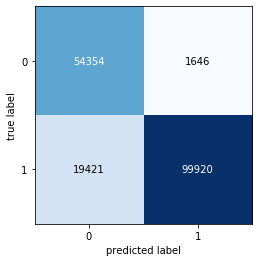

In [155]:
plotting.plot_confusion_matrix(evaluate.confusion_matrix(np.array(target_test) , np.array(test_predictions)))

In [156]:
print(metrics.classification_report(np.array(target_test) , np.array(test_predictions)))

              precision    recall  f1-score   support

           0       0.74      0.97      0.84     56000
           1       0.98      0.84      0.90    119341

    accuracy                           0.88    175341
   macro avg       0.86      0.90      0.87    175341
weighted avg       0.90      0.88      0.88    175341



Text(0.5, 0, 'False Positive Rate')

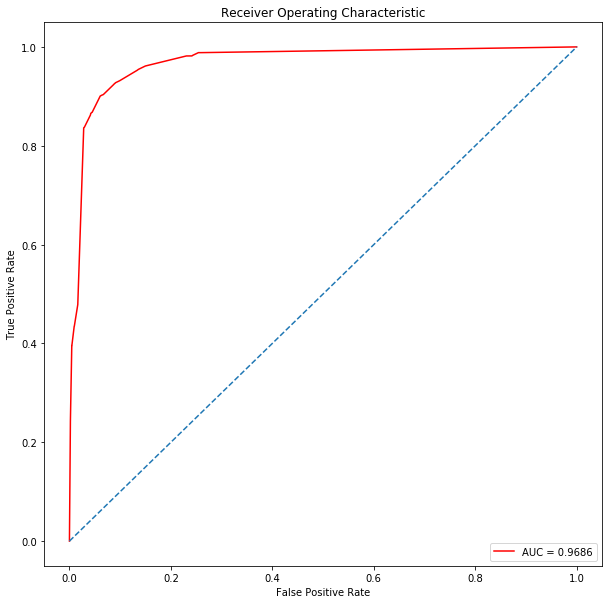

In [157]:
result_proba_rf = rf_base_model.predict_proba(features_test_scaled_df)[:,1] 

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(np.array(target_test) , result_proba_rf)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [181]:
# AUC ROC Curve we can observe that the model has provided a reliable predictions. AUC has a high score

# Fine Tuning the Models

In [158]:
xgb_model = xgb.XGBClassifier(max_depth= 7 , n_estimators= 100 , random_state=123 , n_jobs= -1 )

In [159]:
features_scaled_rfe.columns

Index(['proto', 'sbytes', 'dbytes', 'rate', 'sttl', 'sload', 'dload', 'tcprtt',
       'synack', 'smean', 'ct_state_ttl', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'ct_srv_dst'],
      dtype='object')

In [160]:
xgb_model.fit(features_scaled_rfe , target)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
              max_depth=7, min_child_weight=1, missing=None, n_estimators=100,
              n_jobs=-1, nthread=None, objective='binary:logistic',
              random_state=123, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=1)

In [161]:
xgb_predictions = xgb_model.predict(features_test_scaled_df)

In [162]:
metrics.accuracy_score(np.array(target_test) , np.array(xgb_predictions))

0.8824918302051431

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x26285f6e6c8>)

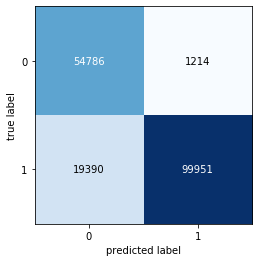

In [163]:
plotting.plot_confusion_matrix(evaluate.confusion_matrix(np.array(target_test) , np.array(xgb_predictions)))

In [164]:
print(metrics.classification_report(np.array(target_test) , np.array(xgb_predictions)))

              precision    recall  f1-score   support

           0       0.74      0.98      0.84     56000
           1       0.99      0.84      0.91    119341

    accuracy                           0.88    175341
   macro avg       0.86      0.91      0.87    175341
weighted avg       0.91      0.88      0.89    175341



Text(0.5, 0, 'False Positive Rate')

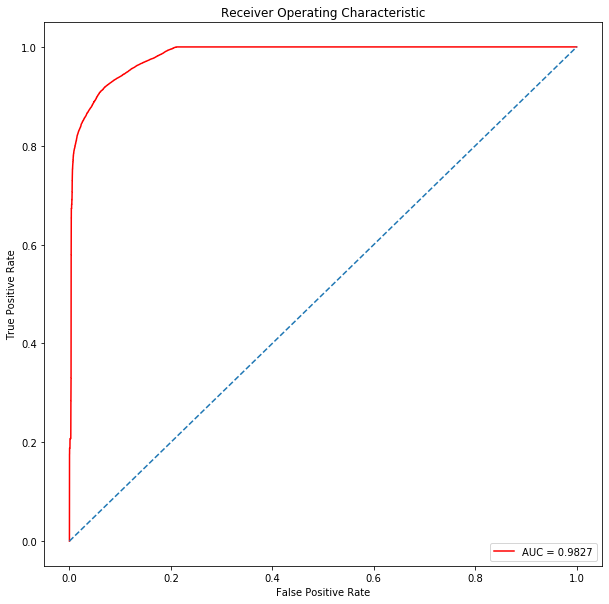

In [165]:
result_proba_rf = xgb_model.predict_proba(features_test_scaled_df)[:,1] 

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(np.array(target_test) , result_proba_rf)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [182]:
# AUC ROC Curve we can observe that the model has provided a reliable predictions. AUC has a high score

In [166]:
param_dict1 = {'max_depth' : [5,6,7,8,9] , 'n_estimators' : [50 , 100 , 150 , 200]}

In [167]:
xgb_model_base = xgb.XGBClassifier()

In [168]:
grid_model_xgb = GridSearchCV(param_grid= param_dict1 ,estimator= xgb_model_base , cv= 3 , n_jobs= -1 )

In [169]:
grid_model_xgb.fit(features_scaled_rfe , target)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bytree=1,
                                     gamma=0, learning_rate=0.1,
                                     max_delta_step=0, max_depth=3,
                                     min_child_weight=1, missing=None,
                                     n_estimators=100, n_jobs=1, nthread=None,
                                     objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=True,
                                     subsample=1),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [5, 6, 7, 8, 9],
                         'n_estimators': [50, 100, 150, 200]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
        

In [170]:
grid_model_xgb.best_params_

{'max_depth': 8, 'n_estimators': 150}

In [171]:
xgb_model2 = xgb.XGBClassifier(max_depth= 6 , n_estimators= 120 , random_state=123 , n_jobs= -1 )

In [172]:
xgb_model2.fit(features_scaled_rfe , target)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=None, n_estimators=120,
              n_jobs=-1, nthread=None, objective='binary:logistic',
              random_state=123, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=1)

In [173]:
xgb_predictions2 = xgb_model2.predict(features_test_scaled_df)

In [174]:
metrics.accuracy_score(np.array(target_test) , np.array(xgb_predictions2))

0.8821325303266206

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x262ba270988>)

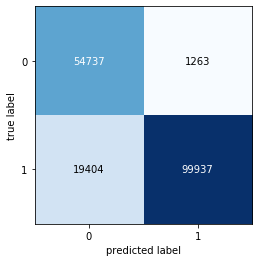

In [175]:
plotting.plot_confusion_matrix(evaluate.confusion_matrix(np.array(target_test) , np.array(xgb_predictions2)))

In [176]:
metrics.f1_score(np.array(target_test) , np.array(xgb_predictions2))

0.9062895334654327

In [177]:
print(metrics.classification_report(np.array(target_test) , np.array(xgb_predictions2)))

              precision    recall  f1-score   support

           0       0.74      0.98      0.84     56000
           1       0.99      0.84      0.91    119341

    accuracy                           0.88    175341
   macro avg       0.86      0.91      0.87    175341
weighted avg       0.91      0.88      0.89    175341



Text(0.5, 0, 'False Positive Rate')

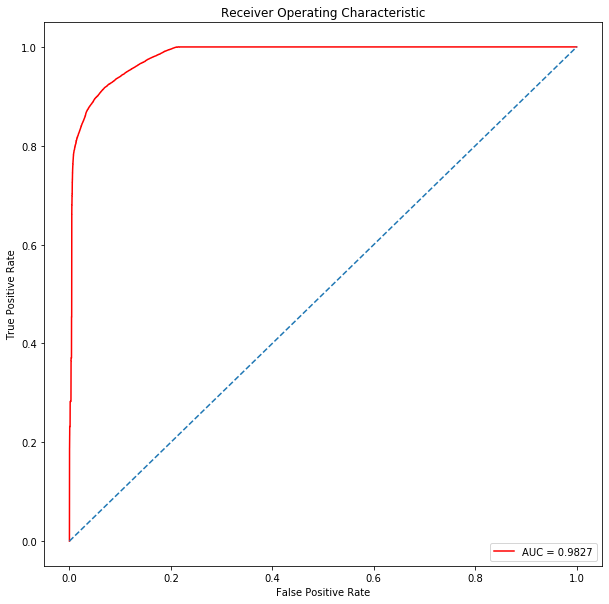

In [178]:
result_proba_rf = xgb_model2.predict_proba(features_test_scaled_df)[:,1] 

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(np.array(target_test) , result_proba_rf)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# Result and Summary

## Accuracy

1. From the analysis, we can identify the best model is XGBoost which has been fine tuned with Grid Search on Selected Hyper Paramaters

2. Final Model F1 Score - 88% , with AUC - 0.9798

3. Model Prediction quality appears to be good with Precision And Recall stablizing at around 81% to 88% for both the classes

In [179]:
col

Index(['proto', 'sbytes', 'dbytes', 'rate', 'sttl', 'sload', 'dload', 'tcprtt',
       'synack', 'smean', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'ct_srv_dst'],
      dtype='object')

## Features Required for the Predictions

'dur' - Record total duration

'sbytes' - Source to destination transaction bytes 

'dbytes' - Destination to source transaction bytes

'rate' - Rate

'sttl' - Source to destination time to live value 

'sload' - Source bits per second

'dload' - Destination bits per second

'tcprtt' - TCP connection setup round-trip time, the sum of ’synack’ and ’ackdat’.

'synack' - TCP connection setup time, the time between the SYN and the SYN_ACK packets.

'smean' - Mean of the how packet size transmitted by the src 

'ct_srv_src' - No. of connections that contain the same service and source address in 100 connections according to the last time (26).

'ct_state_ttl' - No. for each state according to specific range of values for source/destination time to live.

'ct_dst_sport_ltm' - No of connections of the same destination address and the source port in 100 connections according to the last time .

'ct_dst_src_ltm' - No of connections of the same source and the destination address in in 100 connections according to the last time.

'ct_srv_dst' - No. of connections that contain the same service and destination address in 100 connections according to the last time.

## Feature Importance

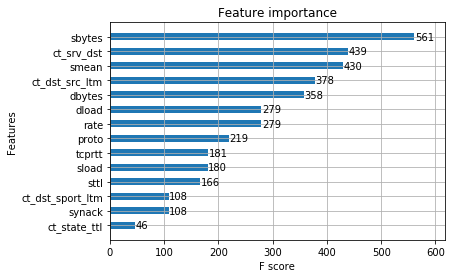

In [180]:

xgb.plot_importance(xgb_model2 ,height= 0.5 , )

From the feature importance , we can identify that the model has considered sbytes , smean , ct_srv_dst as the top 3 features for predictions